# **Trabalho 3**

Todos os anos centenas de filmes são lançados no mundo todo por diversas produtoras que contam com orçamentos de todos os tamanhos, gerando uma indústria bilhonária. Nesse contexto, você como cientista da computação recém formado foi contratado para monitorar em tempo real as impressões da platéia por meio de posts em redes sociais.

Basicamente o seu trabalho é monitorar as impressões positivas e negativas de um determinado filme, nos últimos dias (exemplo: 30 dias). Você poderá fazer isso lendo todas as postagens e interpretando cada uma como positiva ou negativa ou **usando** o conhecimento adquirido durante a graduação e, portanto, automatizar essa tarefa. **Faça a escolha correta** e automatize essa tarefa. 

Para auxiliar nessa tarefa, considere o dataset anterior e os conceitos estudados em sala de aula.

Escolha três filmes* já lançados de sua preferência para conduzir essa análise. Lembre-se que seu trabalho é apresentar uma forma automática de entender impressões positivas e negativas sobre os filmes escolhidos a partir de posts em uma rede social (no caso, o Twitter).

O que você precisa apresentar é:

+ uma análise sobre os posts referentes aos filmes escolhidos (isto é, o notebook contendo o código e comentado. Seja organizado). Por exemplo, espera-se que no mínimo você apresente um gráfico de impressões positivas e negativas sobre cada filme escolhido nos últimos **n** dias.

+ fazer um vídeo de no máximo 5 minutos explicando as tuas principais estratégias.

**Data de entrega:** 10 de agosto de 2022

*Seja prudente na escolha dos filmes, de modo que haja comentários suficientes para a sua análise.

## Collecting tweets

In [1]:
# %pip install python-dotenv tweepy
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import pandas as pd
import tweepy
import os
import re

plt.style.use('fivethirtyeight')
load_dotenv()


True

### Steps

 Para fazer a coleta você precisa ter uma conta de desenvolvedor do Twitter. Obter a conta de desenvolvedor do Twitter pode levar um ou dois dias (para criar sua conta [clique aqui](https://developer.twitter.com/en))

Neste [link](https://medium.com/@dprakash05/twitter-sentiment-analysis-f81f3d24c795) tem um tutorial de como fazer isso.

### Grabbing some tweets
Os próximos trechos de código foram obtidos deste [link](https://medium.com/@dprakash05/twitter-sentiment-analysis-f81f3d24c795)

### Setup account

In [2]:
consumer_key=os.environ['API_KEY']
consumer_secret=os.environ['API_SECRET']
access_token=os.environ['ACCESS_TOKEN']
access_token_secret=os.environ['ACCESS_TOKEN_SECRET']
bearer_token=os.environ['BEARER_TOKEN']


In [3]:
authenticate=tweepy.OAuthHandler(consumer_key,consumer_secret)
## set access token and access token secret
authenticate.set_access_token(access_token, access_token_secret)
## create API object while passing in authentication information
api=tweepy.API(authenticate, wait_on_rate_limit=True)


In [4]:
client = tweepy.Client(
    consumer_key=consumer_key, consumer_secret=consumer_secret,
    access_token=access_token, access_token_secret=access_token_secret,
    wait_on_rate_limit=True
)

print(api.verify_credentials().screen_name)


MaVaiQueDaCerto


In [5]:
movie_names = ["Thor Love and Thunder", "Diary of a wimpy kid", "Metal Lords"]

# tweets to be collected
tweet_count = 10_000
df = pd.DataFrame()

for movie in movie_names:
	t_query = f"{movie} exclude:retweets"
	tweets = tweepy.Cursor(api.search_tweets, q=t_query,
						result_type="recent", count=tweet_count, lang="en").items(tweet_count)
	list_tweets = [tweet for tweet in tweets]

	# load df from file if it exists
	try:
		df = pd.read_csv('./data/tweets.csv')
		print('Loaded tweets from file')
	except:
		print('Could not load file')

	for i, tweet in enumerate(list_tweets):
		# tweet to dict
		tweet_dict = tweet._json
		tweet_dict['movie'] = movie
		curr_df = pd.DataFrame([tweet_dict])

		df = pd.concat([df, curr_df], axis=0)

	display(df.tail())
	display(df.shape)


Loaded tweets from file


,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,lang,movie,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 02 12:17:34 +0000 2022,1554441274588946432,1554441274588946432,@Reelfilms1998 @MCUReport @MarvelCrave What ma...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.554441e+18,1554441031210385408,...,2,False,False,en,Thor Love and Thunder,NaN,NaN,NaN,NaN,NaN
0,Tue Aug 02 12:16:36 +0000 2022,1554441031210385408,1554441031210385408,@TheMightyYuvi @MCUReport @MarvelCrave Thor 1 ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.554441e+18,1554440785625436161,...,3,False,False,en,Thor Love and Thunder,NaN,NaN,NaN,NaN,NaN
0,Tue Aug 02 12:15:59 +0000 2022,1554440877631758338,1554440877631758338,@Chuckles152 Thor: Love and Thunder,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.554324e+18,1554323955309330432,...,0,False,False,en,Thor Love and Thunder,NaN,NaN,NaN,NaN,NaN
0,Tue Aug 02 12:14:34 +0000 2022,1554440520562122753,1554440520562122753,Thor: Love and Thunder. https://t.co/ukkZulLK2O,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,1,False,False,en,Thor Love and Thunder,"{'media': [{'id': 1554440512387846145, 'id_str...",False,NaN,NaN,NaN
0,Tue Aug 02 12:10:52 +0000 2022,1554439587161952256,1554439587161952256,i watched thor love &amp; thunder for the firs...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,11,False,False,en,Thor Love and Thunder,NaN,NaN,NaN,NaN,NaN


Loaded tweets from file


,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,lang,movie,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 02 14:44:32 +0000 2022,1554478257969725441,1554478257969725441,it girl but in a diary of a wimpy kid way,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,4,False,False,en,Diary of a wimpy kid,NaN,NaN,NaN,NaN,NaN
0,Tue Aug 02 14:30:00 +0000 2022,1554474602021142528,1554474602021142528,Today's #BookChooseDay had us looking for a tr...,True,"{'hashtags': [{'text': 'BookChooseDay', 'indic...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,7,False,False,en,Diary of a wimpy kid,NaN,False,NaN,NaN,NaN
0,Tue Aug 02 12:38:27 +0000 2022,1554446531385647106,1554446531385647106,"@d6lay oooo diary of a wimpy kid, good looks rn",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.554387e+18,1554386802538168321,...,0,False,False,en,Diary of a wimpy kid,NaN,NaN,NaN,NaN,NaN
0,Tue Aug 02 12:22:00 +0000 2022,1554442388730421249,1554442388730421249,Here's a 10 year anniversary to one of the bes...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,1,False,False,en,Diary of a wimpy kid,NaN,False,NaN,NaN,NaN
0,Tue Aug 02 12:20:15 +0000 2022,1554441948840316928,1554441948840316928,Our #BookChooseday challenge today is to find ...,True,"{'hashtags': [{'text': 'BookChooseday', 'indic...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://www.hootsuite.com"" rel=""nofol...",NaN,None,...,11,False,False,en,Diary of a wimpy kid,NaN,False,NaN,NaN,NaN


Loaded tweets from file


,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,lang,movie,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 02 17:40:23 +0000 2022,1554522514071736321,1554522514071736321,metal lords,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,0,False,False,en,Metal Lords,NaN,NaN,NaN,NaN,NaN
0,Tue Aug 02 15:38:11 +0000 2022,1554491761308884995,1554491761308884995,"WHY DID I NOT SEE ""METAL LORDS"" MOVIE BEFORE T...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,2,False,False,en,Metal Lords,NaN,False,NaN,NaN,NaN
0,Tue Aug 02 14:52:17 +0000 2022,1554480211776966658,1554480211776966658,"Don't get me wrong,I was happy for Noah and Me...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,0,False,False,en,Metal Lords,NaN,False,1.554479e+18,1554478741778321409,{'created_at': 'Tue Aug 02 14:46:27 +0000 2022...
0,Tue Aug 02 13:38:35 +0000 2022,1554461663667126274,1554461663667126274,Metal lords(2022)🎬,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,0,False,False,en,Metal Lords,NaN,NaN,NaN,NaN,NaN
0,Tue Aug 02 13:04:34 +0000 2022,1554453100664168449,1554453100664168449,im watching metal lords and i love the movie s...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,1,False,False,en,Metal Lords,NaN,NaN,NaN,NaN,NaN


In [25]:
df.shape


(7928, 33)

In [6]:
# remove id duplicates
df = df.drop_duplicates(subset='id', keep='first')

# save df to csv
df.to_csv('./data/tweets.csv', index=False)


## Processing Tweets

In [7]:
# %pip install python-dotenv tweepy
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import pandas as pd
import tweepy
import os
import re

plt.style.use('fivethirtyeight')
_ = load_dotenv()


### Load Data

In [8]:
df = pd.read_csv('./data/tweets.csv')

display(df.tail())


,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,lang,movie,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status
7923,Wed Aug 10 19:05:14 +0000 2022,1557442971603288070,1557442971603288070,@ratrodbenny @AmberDawnGlover In the end it wi...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",1.557200e+18,1.557200e+18,...,0,False,False,en,Metal Lords,NaN,NaN,NaN,NaN,NaN
7924,Wed Aug 10 18:24:34 +0000 2022,1557432736293351424,1557432736293351424,"@SentaMosesMikan movie recommendation-- ""metal...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,1,False,False,en,Metal Lords,NaN,NaN,NaN,NaN,NaN
7925,Wed Aug 10 17:30:07 +0000 2022,1557419034018209793,1557419034018209793,hunter sylvester from metal lords has ppd (hc/...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,6,False,False,en,Metal Lords,"{'media': [{'id': 1557419028045504515, 'id_str...",False,NaN,NaN,NaN
7926,Wed Aug 10 17:00:12 +0000 2022,1557411503157944320,1557411503157944320,Okay I've had enough of the vague book recomme...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,5,False,False,en,Metal Lords,NaN,False,NaN,NaN,NaN
7927,Tue Aug 09 00:01:15 +0000 2022,1556792687235215360,1556792687235215360,"That video has the Metal Lords vibe , can u pl...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,0,False,False,en,Metal Lords,"{'media': [{'id': 1265315007799218178, 'id_str...",False,NaN,NaN,NaN


### Preprocessing

In [9]:
# remove name of person who tweeted
df['text'] = df['text'].apply((lambda x: re.sub(r'@[_A-Za-z0-9]+', '', x)))

# remove urls
df['text'] = df['text'].apply((lambda x: re.sub(r'https?://[A-Za-z0-9./]+', '', x)))

# clean tweets
df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]', '', x)))
df['text'] = df['text'].apply((lambda x: re.sub('\s+', ' ', x)))

# trim extra whitespace
df['text'] = df['text'].apply(lambda x: x.strip())


display(df.head())


,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,lang,movie,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status
0,Wed Aug 10 13:47:04 +0000 2022,1557362902276923393,1557362902276923393,you all could of done better with thor love an...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,0,False,False,en,Thor Love and Thunder,NaN,NaN,NaN,NaN,NaN
1,Wed Aug 10 13:41:56 +0000 2022,1557361606496882691,1557361606496882691,i think i figured out why some people hate pha...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,0,False,False,en,Thor Love and Thunder,NaN,NaN,NaN,NaN,NaN
2,Wed Aug 10 13:41:17 +0000 2022,1557361445456658443,1557361445456658443,thor love and thunder bts thor godofthunder th...,False,"{'hashtags': [{'text': 'thor', 'indices': [30,...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,0,False,False,en,Thor Love and Thunder,"{'media': [{'id': 1557361372979023875, 'id_str...",False,NaN,NaN,NaN
3,Wed Aug 10 13:37:39 +0000 2022,1557360532344242182,1557360532344242182,nah wtffff i guess i have more reason to hate ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,0,False,False,en,Thor Love and Thunder,NaN,False,1.557101e+18,1.557101e+18,{'created_at': 'Tue Aug 09 20:28:16 +0000 2022...
4,Wed Aug 10 13:33:03 +0000 2022,1557359374468775937,1557359374468775937,watching the sandman the week after seeing tho...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://about.twitter.com/products/tw...",NaN,NaN,...,3,False,False,en,Thor Love and Thunder,NaN,NaN,NaN,NaN,NaN


## Analysis

### Wordcloud

['Thor Love and Thunder' 'Diary of a wimpy kid' 'Metal Lords']
Wordcloud for Thor Love and Thunder created


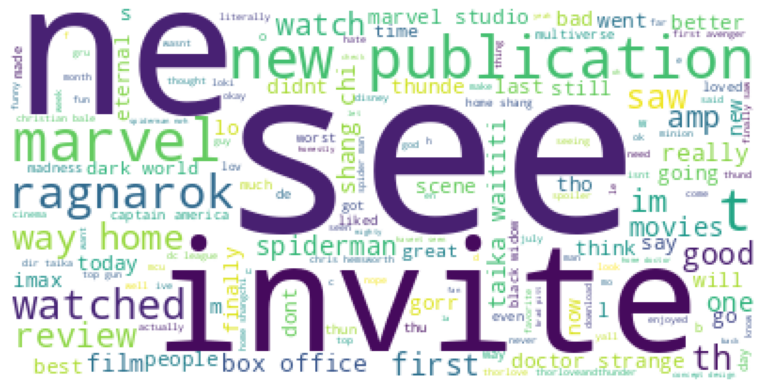

Wordcloud for Diary of a wimpy kid created


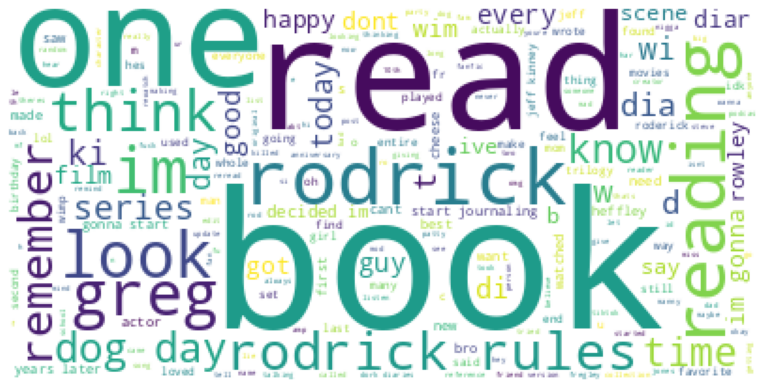

Wordcloud for Metal Lords created


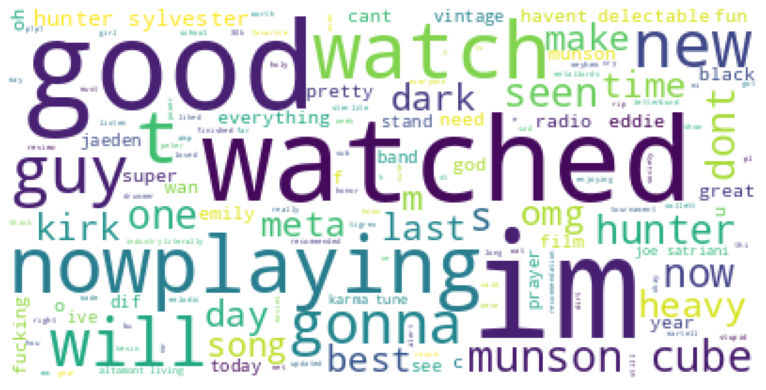

In [10]:
# create word cloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

movies = df['movie'].unique()

print(movies)

stopwords = set(STOPWORDS)
for stp_word in ['movie', 'thor', 'love', 'thunder', 'metal', 'lords', 'diary', 'wimpy', 'kid', 'netflix', 'watching']:
    stopwords.add(stp_word)

for movie in movies:
    movie_df = df[df["movie"] == movie]

    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        random_state=42
    ).generate(movie_df['text'].to_string())

    print('Wordcloud for {} created'.format(movie))
    plt.figure(figsize=(12, 12))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()


### Sentiment Analysis

In [11]:
# perform sentiment analysis
from textblob import TextBlob


def sentiment_analysis(df):
    df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
    return df

df = sentiment_analysis(df)
display(df[['text', 'sentiment']].head())


,text,sentiment
0,you all could of done better with thor love an...,0.400000
1,i think i figured out why some people hate pha...,-0.450000
2,thor love and thunder bts thor godofthunder th...,0.500000
3,nah wtffff i guess i have more reason to hate ...,0.066667
4,watching the sandman the week after seeing tho...,0.500000


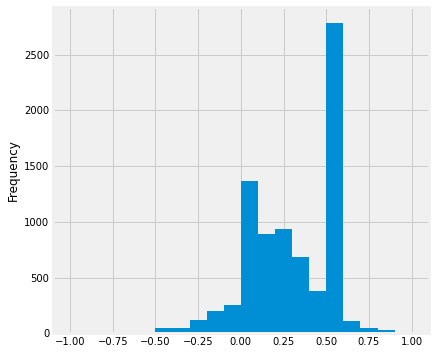

In [12]:
# create sentiment graph
df['sentiment'].plot(kind='hist', bins=20, figsize=(6, 6))
plt.show()


In [13]:
# perform sentiment analysis using transformers
from transformers import pipeline


sentiment_analysis = pipeline("sentiment-analysis")

# apply sentiment analysis
df['sentiment'] = df['text'].apply(lambda x: sentiment_analysis(x))

display(df[['text', 'sentiment']].head())


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


,text,sentiment
0,you all could of done better with thor love an...,"[{'label': 'NEGATIVE', 'score': 0.997150599956..."
1,i think i figured out why some people hate pha...,"[{'label': 'NEGATIVE', 'score': 0.999630331993..."
2,thor love and thunder bts thor godofthunder th...,"[{'label': 'POSITIVE', 'score': 0.989458799362..."
3,nah wtffff i guess i have more reason to hate ...,"[{'label': 'NEGATIVE', 'score': 0.998903989791..."
4,watching the sandman the week after seeing tho...,"[{'label': 'NEGATIVE', 'score': 0.998061835765..."


In [14]:
df['sentiment_label'] = df['sentiment'].apply(lambda x: x[0]['label'])
df['sentiment_score'] = df['sentiment'].apply(lambda x: x[0]['score'])

display(df[['sentiment_label', 'sentiment_score', 'text']].head())


,sentiment_label,sentiment_score,text
0,NEGATIVE,0.997151,you all could of done better with thor love an...
1,NEGATIVE,0.999630,i think i figured out why some people hate pha...
2,POSITIVE,0.989459,thor love and thunder bts thor godofthunder th...
3,NEGATIVE,0.998904,nah wtffff i guess i have more reason to hate ...
4,NEGATIVE,0.998062,watching the sandman the week after seeing tho...


In [15]:
df['sentiment_label'].unique()


array(['NEGATIVE', 'POSITIVE'], dtype=object)

In [16]:
def unify_score(row):
    row_label = row['sentiment_label']
    row_score = (row['sentiment_score'] - 0.5) * 2

    return -row_score if row_label == "NEGATIVE" else row_score

df['sentiment'] = df[['sentiment_label', 'sentiment_score']].apply(unify_score, axis=1)

display(df[['sentiment', 'text']].head())


,sentiment,text
0,-0.994301,you all could of done better with thor love an...
1,-0.999261,i think i figured out why some people hate pha...
2,0.978918,thor love and thunder bts thor godofthunder th...
3,-0.997808,nah wtffff i guess i have more reason to hate ...
4,-0.996124,watching the sandman the week after seeing tho...


### Save Checkpoint

In [17]:
# save df to csv
df.to_csv('./data/sentimental_tweets.csv', index=False)


### Load Checkpoint

In [18]:
import pandas as pd


# load df from file if it exists
df = pd.read_csv('./data/sentimental_tweets.csv')

display(df.tail())


,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,lang,movie,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,sentiment,sentiment_label,sentiment_score
7923,Wed Aug 10 19:05:14 +0000 2022,1557442971603288070,1557442971603288070,in the end it will be worth every moment of pa...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",1.557200e+18,1.557200e+18,...,en,Metal Lords,NaN,NaN,NaN,NaN,NaN,0.996440,POSITIVE,0.998220
7924,Wed Aug 10 18:24:34 +0000 2022,1557432736293351424,1557432736293351424,movie recommendation metal lords on netflix ve...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,en,Metal Lords,NaN,NaN,NaN,NaN,NaN,0.998768,POSITIVE,0.999384
7925,Wed Aug 10 17:30:07 +0000 2022,1557419034018209793,1557419034018209793,hunter sylvester from metal lords has ppd hcpo...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,en,Metal Lords,"{'media': [{'id': 1557419028045504515, 'id_str...",False,NaN,NaN,NaN,-0.912109,NEGATIVE,0.956055
7926,Wed Aug 10 17:00:12 +0000 2022,1557411503157944320,1557411503157944320,okay ive had enough of the vague book recommen...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,en,Metal Lords,NaN,False,NaN,NaN,NaN,-0.964433,NEGATIVE,0.982216
7927,Tue Aug 09 00:01:15 +0000 2022,1556792687235215360,1556792687235215360,that video has the metal lords vibe can u play...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,en,Metal Lords,"{'media': [{'id': 1265315007799218178, 'id_str...",False,NaN,NaN,NaN,0.128956,POSITIVE,0.564478


### Check sentiment distribution

Sentiment for Thor Love and Thunder


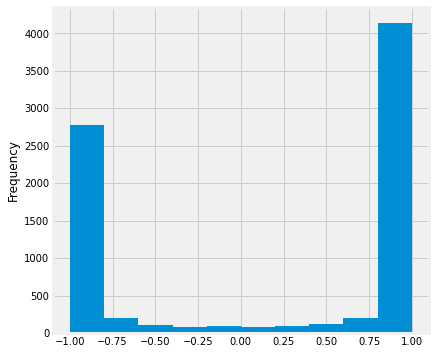

Sentiment for Diary of a wimpy kid


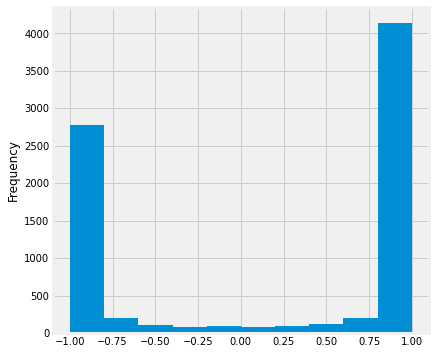

Sentiment for Metal Lords


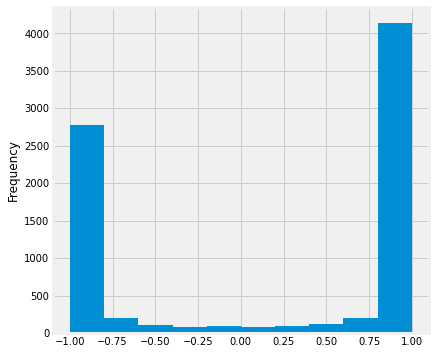

In [19]:
movies = df['movie'].unique()

for movie in movies:
    movie_df = df[df["movie"] == movie]

    # create sentiment graph
    print('Sentiment for {}'.format(movie))
    df['sentiment'].plot(kind='hist', bins=10, figsize=(6, 6))
    plt.show()


### Plotting most positive and most negative tweets

In [20]:
# most negative comment per movie

movies = df["movie"].unique()

for movie in movies:
    movie_df = df[df["movie"] == movie]

    # sort select only negative
    neg_df = movie_df.sort_values(by=["sentiment"], ascending=True)

    print(f"\n-- {movie} --")
    for row in neg_df[["sentiment", "text"]].head().itertuples():
        _, sentiment, tweet = row
        print(f"[{sentiment:.8f}] {tweet.strip()}")



-- Thor Love and Thunder --
[-0.99963033] thor love and thunder is an absolute mess of a film so so bad
[-0.99962747] okay lets see how bad this movie is nowwatching thor love and thunder
[-0.99962699] thor love and thunder is the worst thing ive watched this year the jokes are tired in fact it seems every singl
[-0.99962199] venom 1 is boring the plot is generic asf thor love and thunder is an unfunny unfinished mess of a film
[-0.99961603] how long before we can acknowledge thor love and thunder is actually pretty bad

-- Diary of a wimpy kid --
[-0.99960506] i would want the diary of a wimpy kid so bad
[-0.99958551] this is just a shitty version of when everyone in 2018 made diary of a wimpy kid parody accounts
[-0.99956787] unless its diary of a wimpy kid the after fanfic or harry potter it will not catch my attention
[-0.99948919] 51 diary of a wimpy kid the movie i feel like im missing somethingsomeone this movie sucks
[-0.99948466] why are we shipping rowley and greg from diary

In [21]:
# most positive comment per movie

movies = df["movie"].unique()

for movie in movies:
    movie_df = df[df["movie"] == movie]

    # sort select only positive
    pos_df = movie_df.sort_values(by=["sentiment"], ascending=False)

    print(f"\n-- {movie} --")
    for row in pos_df[["sentiment", "text"]].head().itertuples():
        _, sentiment, tweet = row
        print(f"[{sentiment:.8f}] {tweet.strip()}")



-- Thor Love and Thunder --
[0.99978280] thor love and thunder was just heartbreaking and beautiful and funny and sweet and epic enjoyed every minute
[0.99978018] thor love and thunder is an incredibly fun and wonderful movie
[0.99977875] thor love and thunder is fantastic and fun and i loved it
[0.99977469] thor love and thunder is a pretty good and fun movie i feel like im alone in feeling thor is a pretty well developed character
[0.99977350] thor love and thunder is a wonderful complete movie

-- Diary of a wimpy kid --
[0.99961174] diary of a wimpy kid is quite good
[0.99958146] more diary of a wimpy kid appreciation nice also i agree and rodrick is definitely the best character in the bo
[0.99956739] diary of a wimpy kid rodrick rules is the best movie in that series
[0.99956024] happy national book lovers day this day celebrates literature amp books motivating people to simply read sit back
[0.99954998] diary of a wimpy kid is one of the best book series ive ever read

-- Metal

### Plotting Mean Sentiment Distribution

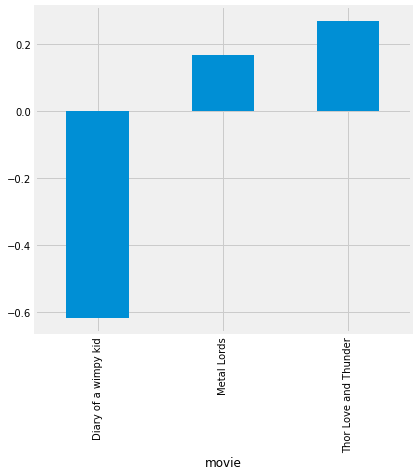

In [22]:
# plot sentiment score per movie

movie_sentiment = df.groupby(['movie'])['sentiment'].mean()
movie_sentiment.plot(kind='bar', figsize=(6, 6))
plt.show()


### Wordcloud for most positive and most negative tweets

Wordcloud for Thor Love and Thunder created


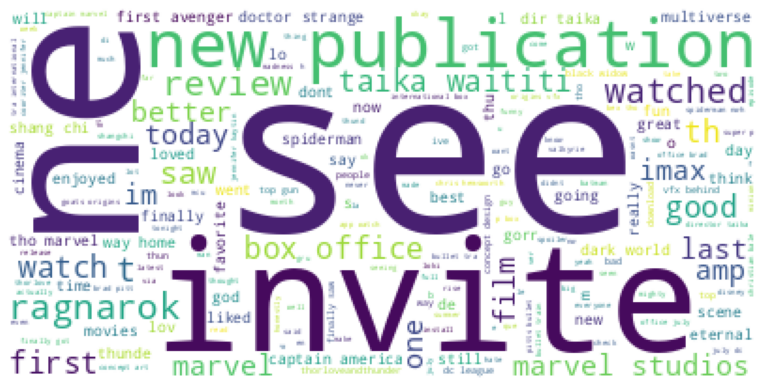

Wordcloud for Diary of a wimpy kid created


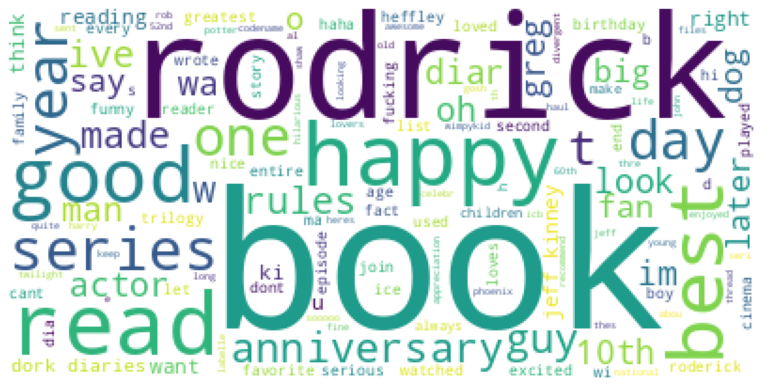

Wordcloud for Metal Lords created


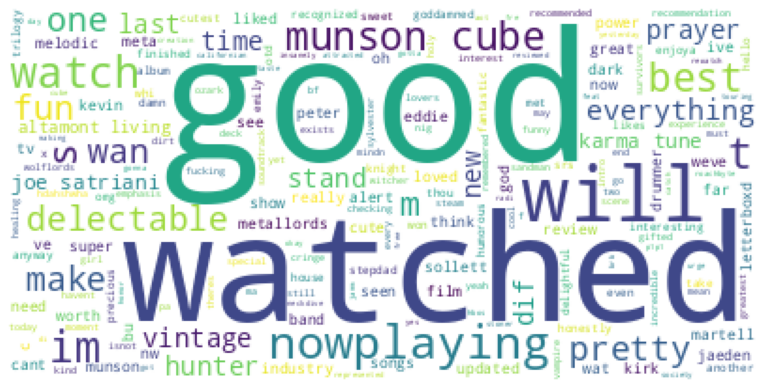

In [23]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)

movies = df["movie"].unique()

for movie in movies:
    # word frequency bar chart for most positive comments
    movie_df = df[df["movie"] == movie]

    # sort select only positive
    pos_df = movie_df.sort_values(by=["sentiment"], ascending=False)

    # cap only positive comments
    pos_df = pos_df[pos_df["sentiment"] > 0]

    # create word cloud
    for stp_word in ['movie', 'thor', 'love', 'thunder', 'metal', 'lords', 'diary', 'wimpy', 'kid', 'netflix', 'watching']:
        stopwords.add(stp_word)

    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        random_state=42
    ).generate(pos_df['text'].to_string())

    # display word cloud
    print('Wordcloud for {} created'.format(movie))
    plt.figure(figsize=(12, 12))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    

Wordcloud for Thor Love and Thunder created


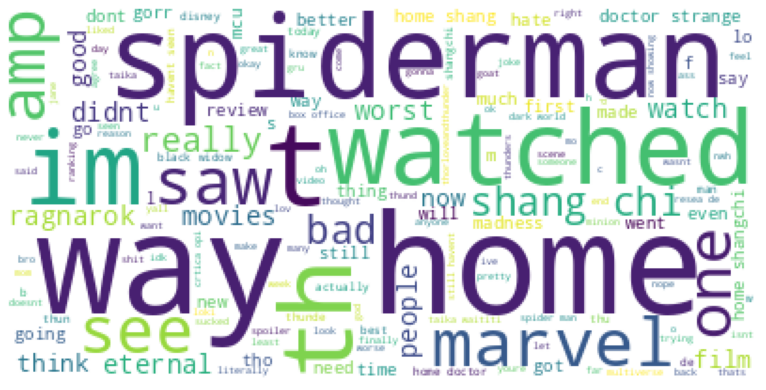

Wordcloud for Diary of a wimpy kid created


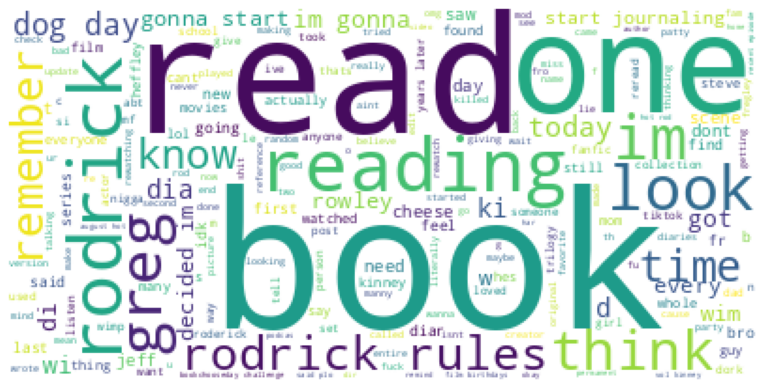

Wordcloud for Metal Lords created


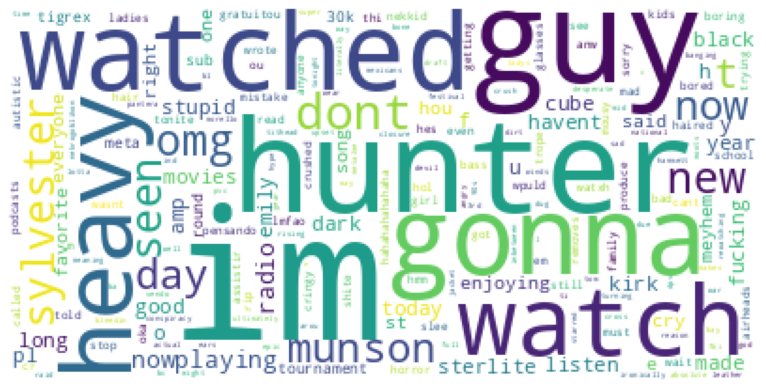

In [24]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)

movies = df["movie"].unique()

for movie in movies:
    # word frequency bar chart for most negative comments
    movie_df = df[df["movie"] == movie]

    # sort select only negative
    pos_df = movie_df.sort_values(by=["sentiment"], ascending=True)

    # cap only negative comments
    pos_df = pos_df[pos_df["sentiment"] < 0]

    # create word cloud
    for stp_word in ['movie', 'thor', 'love', 'thunder', 'metal', 'lords', 'diary', 'wimpy', 'kid', 'netflix', 'watching']:
        stopwords.add(stp_word)

    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        random_state=42
    ).generate(pos_df['text'].to_string())

    # display word cloud
    print('Wordcloud for {} created'.format(movie))
    plt.figure(figsize=(12, 12))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    